In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_excel(r"E:\data science excelr\(7)clustering\EastWestAirlines.xlsx",sheet_name=1)
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [3]:
df1= df.drop(columns=['ID#'])
df1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [4]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [5]:
x=sc.fit_transform(df1)
x

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [6]:
from scipy.cluster import hierarchy

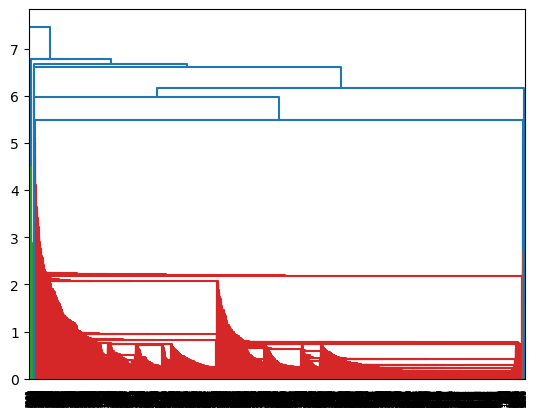

In [7]:
lk=hierarchy.linkage(x,method='single')
dendrogram=hierarchy.dendrogram(lk)

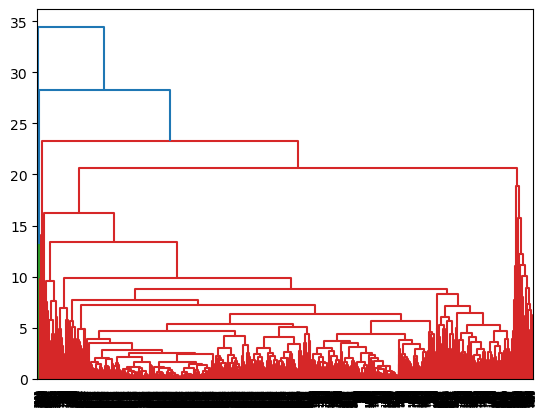

In [8]:
lk=hierarchy.linkage(x,method='complete')
dendrogram=hierarchy.dendrogram(lk)

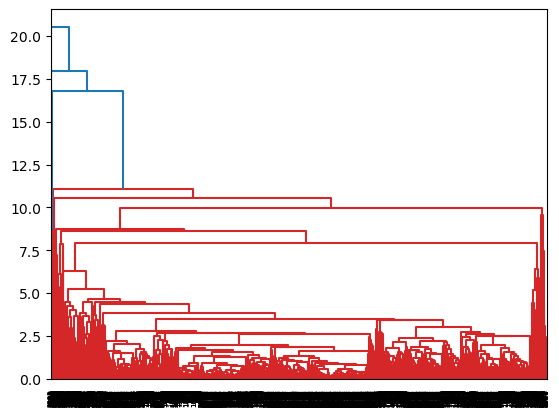

In [9]:
lk=hierarchy.linkage(x,method='average')
dendrogram=hierarchy.dendrogram(lk)

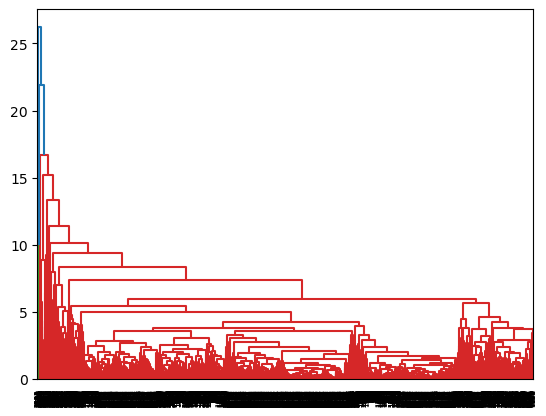

In [10]:
lk=hierarchy.linkage(x,method='weighted')
dendrogram=hierarchy.dendrogram(lk)

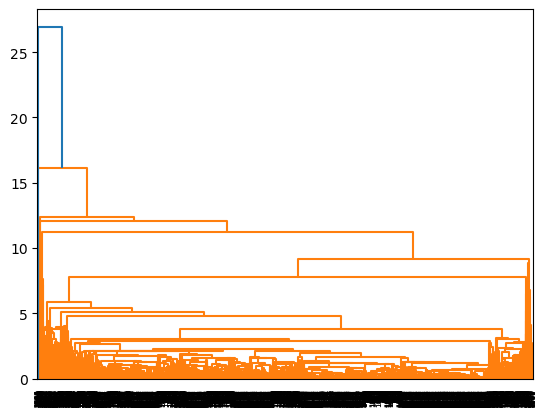

In [11]:
lk=hierarchy.linkage(x,method='centroid')
dendrogram=hierarchy.dendrogram(lk)

In [12]:
from sklearn.cluster import AgglomerativeClustering

In [13]:
hc=AgglomerativeClustering(n_clusters=5)
y=hc.fit_predict(x)

In [14]:
df1['Cluster']=y
df1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,1


In [15]:
df1.groupby('Cluster').agg('mean')

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
Cluster,,,,,,,,,,,
0,116134.226872,367.779736,3.500000,1.000000,1.000000,36501.331865,17.958884,376.402349,1.147577,4699.638767,0.665198
1,46329.336877,9.028618,1.244072,1.000000,1.000000,4868.112428,6.907604,214.812756,0.673753,3769.337694,0.184383
2,134880.892308,393.323077,2.430769,1.000000,1.000000,36582.169231,29.338462,5915.523077,16.638462,4599.607692,0.753846
3,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349
4,129951.388889,65.666667,3.388889,1.000000,3.722222,86259.888889,26.222222,422.222222,1.333333,4488.777778,0.500000


<AxesSubplot:xlabel='Cluster', ylabel='Balance'>

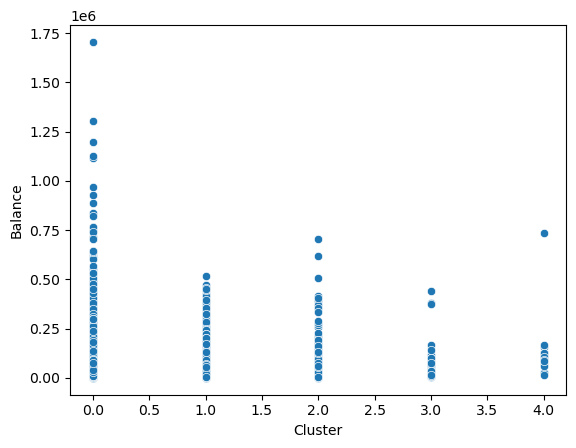

In [16]:
import seaborn as sns
sns.scatterplot(df1['Cluster'],df1['Balance'])

<AxesSubplot:xlabel='Cluster', ylabel='Qual_miles'>

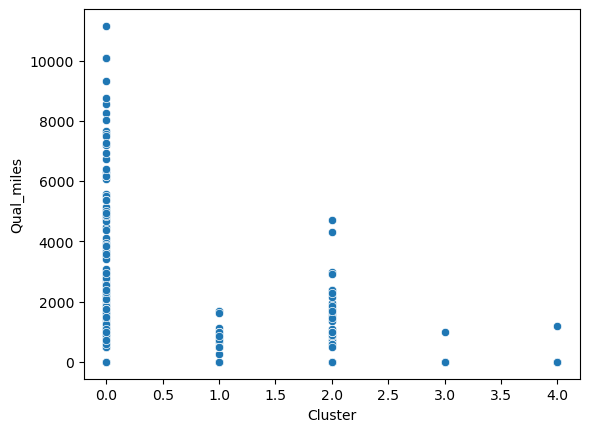

In [17]:
sns.scatterplot(df1['Cluster'],df1['Qual_miles'])

K means

In [18]:
from sklearn.cluster import KMeans

In [21]:
km=KMeans()
y=km.fit_predict(df1)
y

array([5, 5, 5, ..., 4, 4, 5])

In [22]:
km.cluster_centers_

array([[6.80923980e+04, 1.55952381e+02, 4.28231293e+00, 1.01020408e+00,
        1.10544218e+00, 5.98575918e+04, 2.12108844e+01, 7.56707483e+02,
        2.15306122e+00, 4.69194218e+03, 7.61904762e-01, 3.06122449e-01],
       [4.02195247e+05, 4.56753086e+02, 3.22222222e+00, 1.03703704e+00,
        1.00000000e+00, 4.92972222e+04, 1.92839506e+01, 1.52107407e+03,
        4.70370370e+00, 5.94250617e+03, 7.16049383e-01, 5.30864198e-01],
       [1.35933453e+05, 2.54805882e+02, 2.88431373e+00, 1.00980392e+00,
        1.02941176e+00, 2.83118667e+04, 1.60882353e+01, 7.81215686e+02,
        2.27058824e+00, 4.84585490e+03, 4.41176471e-01, 5.17647059e-01],
       [7.35987952e+05, 2.70952381e+02, 3.42857143e+00, 1.00000000e+00,
        1.14285714e+00, 6.22493810e+04, 2.22857143e+01, 1.62952381e+03,
        5.90476190e+00, 6.13952381e+03, 8.57142857e-01, 3.80952381e-01],
       [6.68097356e+04, 1.20368363e+02, 1.98119469e+00, 1.01327434e+00,
        1.00000000e+00, 1.23011117e+04, 1.17433628e+01, 4.14

In [23]:
x=pd.DataFrame(df1)
x['Cluster']=y
x

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,5
1,19244,0,1,1,1,215,2,0,0,6968,0,5
2,41354,0,1,1,1,4123,4,0,0,7034,0,5
3,14776,0,1,1,1,500,1,0,0,6952,0,5
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,5
3995,64385,0,1,1,1,981,5,0,0,1395,1,4
3996,73597,0,3,1,1,25447,8,0,0,1402,1,4
3997,54899,0,1,1,1,500,1,500,1,1401,0,4


In [24]:
wcss=[]

for i in range(1,25):
    km=KMeans(n_clusters=i)
    km.fit_predict(x)
    wcss.append(km.inertia_)

In [25]:
wcss

[42961820057005.67,
 20823632652325.875,
 11790659269509.496,
 7549630969746.265,
 5724844358793.906,
 4541450680632.616,
 3697889251202.481,
 3272288037491.632,
 2897588365926.5874,
 2625335127472.7324,
 2380318119511.057,
 2139950856687.1008,
 1964624998231.2898,
 1829667490565.3828,
 1700957026197.072,
 1587687296802.6318,
 1462818038436.4888,
 1373684255129.605,
 1290117975965.6748,
 1210570501407.3,
 1158319970904.3218,
 1096549402459.4119,
 1040069990877.4148,
 1003396318516.7802]

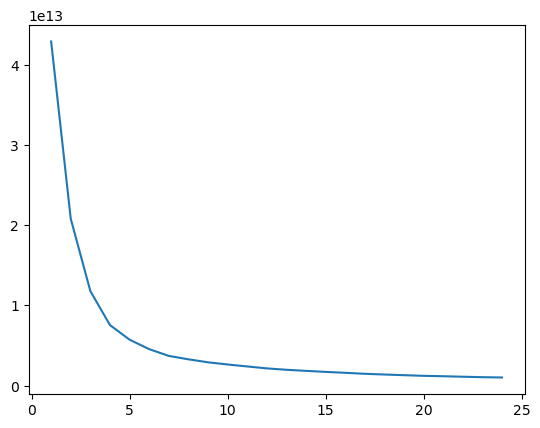

In [26]:
plt.plot(range(1,25),wcss)

In [28]:
x1=x.iloc[:,:-1]
x1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [29]:
km=KMeans(n_clusters=4)
y=km.fit_predict(x1)
y

array([0, 0, 0, ..., 0, 0, 0])

In [30]:
x1['Cluster']=y
x1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


In [32]:
df['Cluster']=y
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


DBSCAN

In [33]:
from sklearn.cluster import DBSCAN

In [35]:
d=sc.fit_transform(x)

In [36]:
d

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
         1.39545434e+00, -7.66919299e-01,  6.25583839e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
         1.37995704e+00, -7.66919299e-01,  6.25583839e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
         1.41192021e+00, -7.66919299e-01,  6.25583839e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -1.31560393e+00,  1.30391816e+00,  6.04204302e-03],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -1.31608822e+00, -7.66919299e-01,  6.04204302e-03],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -1.31754109e+00, -7.66919299e-01,  6.25583839e-01]])

In [37]:
db=DBSCAN()
db.fit(d)

DBSCAN()

In [39]:
db.labels_

array([ 0,  0,  0, ..., -1,  3,  0], dtype=int64)

In [38]:
from sklearn.metrics import silhouette_score

In [40]:
silhouette_score(d,db.labels_)

-0.18511219838974743

In [60]:
db=DBSCAN(eps=10,min_samples=13)
db.fit(d)

DBSCAN(eps=10, min_samples=13)

In [61]:
db.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [58]:
silhouette_score(d,db.labels_)

0.8478437040059048

In [70]:
df=df.drop(columns=['Cluster'])


In [71]:
df['Y']=db.labels_

In [72]:
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Y
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [73]:
df.groupby('Y').agg('mean')

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
Y,,,,,,,,,,,,
-1,3606.000000,160114.000000,500.000000,1.00000,1.000000,1.000000,71954.000000,86.000000,30817.000000,53.00000,1373.000000,1.000000
0,2014.421461,73579.688594,144.025513,2.05978,1.014507,1.012256,17131.137069,11.583292,452.462731,1.36068,4119.246123,0.370185
